### DQN model

In [1]:
import yaml
import pandas as pd
from mushroom_rl.core import Core
from mushroom_rl.algorithms.value import DQN
from mushroom_rl.policy import EpsGreedy
from mushroom_rl.utils.parameters import Parameter
from mushroom_rl.utils.callbacks import CollectDataset, CollectMaxQ

from scripts.dqn.dqn import DQNAgent
from scripts.dqn.env import WaterNetworkEnvironment
from scripts.dqn.logger import InfoLogger
from scripts import objFunction

Logging in folder: ..\..\results\DQN\anytown


In [2]:
dqn = DQN.load("../scripts/dqn/saved_models/dqn_good.msh")

In [3]:
config_file = '../scripts/dqn/anytown.yaml'
with open(config_file, 'r') as fin:
    hparams = yaml.safe_load(fin) 

env = WaterNetworkEnvironment(
    town=hparams['env']['town'],
    state_vars=hparams['env']['state_vars'],
    action_vars=hparams['env']['action_vars'],
    duration=hparams['env']['duration'],
    hyd_step=hparams['env']['hyd_step'],
    pattern_step=hparams['env']['pattern_step'],
    pattern_file='../demand_patterns/demands_anytown.csv',
    seed=130,
    update_every=hparams['env']['update_every'],
    bounds=hparams['env']['bounds'],
    logger=InfoLogger(),
    show_plot=None
)
dqn.env = env

In [4]:
dqn.epsilon_test = Parameter(value=0.05)
dqn.pi = EpsGreedy(epsilon=dqn.epsilon_test)
dqn.scores = []

In [5]:
dqn.core = Core(dqn, dqn.env)

In [6]:
dataset, qs_list = dqn.evaluate(get_data=True, collect_qs=True)

  0%|          | 0/1 [00:00<?, ?it/s]

20/07/2021 17:16:44 [INFO] Evaluation..
20/07/2021 17:16:44 [INFO] ---------------------------------------------------------------------------------------------------


C:\Users\david\Documents\PyCharmProjects\msc_thesis\epynet\baseobject.py:64: UserWarning: requesting dynamic properties from an unsolved network
  warnings.warn("requesting dynamic properties from an unsolved network")
                                             

DSR: 0.9065568676052477
Total updates: 21
20/07/2021 17:17:43 [INFO] ###################################################################################################


In [7]:
dataset

,current_state,action,reward,next_state,absorbing_state,last_step
0,"[0.0, 1.0, 1.0, 0.0, 0.0, 0.0]",[3],1.000000,"[0.0, 1.0, 3.0500748, 3.0476344, 85.35038]",False,False
1,"[0.0, 1.0, 3.0500748, 3.0476344, 85.35038]",[3],0.968062,"[2.0, 1.0, 3.048419, 3.048, 84.71333]",False,False
2,"[2.0, 1.0, 3.048419, 3.048, 84.71333]",[3],0.968056,"[3.0, 1.0, 3.048, 3.048, 84.71315]",False,False
3,"[3.0, 1.0, 3.048, 3.048, 84.71315]",[3],0.838435,"[603.0, 1.0, 3.048, 3.048, 82.8128]",False,False
4,"[603.0, 1.0, 3.048, 3.048, 82.8128]",[3],0.838435,"[1203.0, 1.0, 3.048, 3.048, 82.8128]",False,False
...,...,...,...,...,...,...
1021,"[83400.0, 7.0, 3.048, 3.048, 70.70122]",[1],0.751213,"[84000.0, 7.0, 3.048, 3.048, 70.70122]",False,False
1022,"[84000.0, 7.0, 3.048, 3.048, 70.70122]",[1],0.751213,"[84600.0, 7.0, 3.048, 3.048, 70.70122]",False,False
1023,"[84600.0, 7.0, 3.048, 3.048, 70.70122]",[1],0.751213,"[85200.0, 7.0, 3.048, 3.048, 70.70122]",False,False
1024,"[85200.0, 7.0, 3.048, 3.048, 70.70122]",[1],0.751213,"[85800.0, 7.0, 3.048, 3.048, 70.70122]",False,False


In [8]:
len(qs_list)

974

In [9]:
qs_list

[[28.74129867553711,
  28.759103775024414,
  28.533178329467773,
  29.008638381958008],
 [282.2231140136719, 281.2680358886719, 281.9548034667969, 282.6341247558594],
 [280.5093688964844, 279.56097412109375, 280.241455078125, 280.91943359375],
 [280.5150451660156,
  279.56671142578125,
  280.24713134765625,
  280.9251403808594],
 [278.0710754394531, 277.16668701171875, 277.8036804199219, 278.4817810058594],
 [279.9858093261719, 279.1064147949219, 279.71807861328125, 280.3963928222656],
 [281.90057373046875, 281.0461120605469, 281.6324462890625, 282.3110046386719],
 [285.8899230957031,
  285.0577087402344,
  285.62078857421875,
  286.30548095703125],
 [288.3274230957031, 287.5216064453125, 288.0577087402344, 288.7464294433594],
 [284.2999572753906, 283.53045654296875, 284.031494140625, 284.71063232421875],
 [277.0675354003906,
  276.3460388183594,
  276.80108642578125,
  277.46759033203125],
 [270.8450622558594, 270.1678771972656, 270.580322265625, 271.23516845703125],
 [273.65145874023

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_q_values(action):
    figure, ax = plt.subplots(figsize=[10,5])
    lines, = ax.plot(range(len(qs_list)), [qs_list[i][0] for i in range(len(qs_list))], label="action_"+str(0))
    lines, = ax.plot(range(len(qs_list)), [qs_list[i][1] for i in range(len(qs_list))], label="action_"+str(1))
    lines, = ax.plot(range(len(qs_list)), [qs_list[i][2] for i in range(len(qs_list))], label="action_"+str(2))
    lines, = ax.plot(range(len(qs_list)), [qs_list[i][3] for i in range(len(qs_list))], label="action_"+str(3))
    plt.xlim(0, len(dqn.env.wn.times))
    ax.legend()

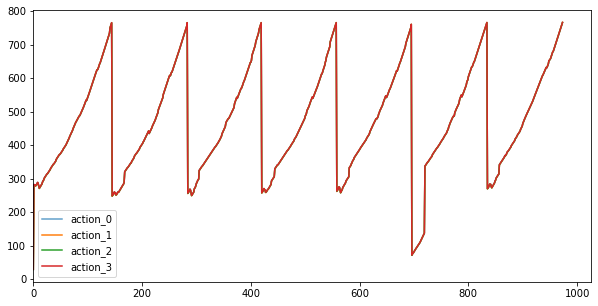

In [21]:
plot_q_values(0)

In [8]:
dqn.env.wn.create_df_reports()

In [9]:
dqn.env.wn.df_nodes_report

node                 tanks                                               \
id                      41                          42                    
properties            head  pressure  level       head  pressure  level   
0 days 00:00:00  69.585075  3.050075  3.051  69.582634  3.047634  3.051   
0 days 00:00:02  69.583419  3.048419  3.051  69.583000  3.048000  3.051   
0 days 00:00:03  69.583000  3.048000  3.051  69.583000  3.048000  3.051   
0 days 00:10:03  69.583000  3.048000  3.051  69.583000  3.048000  3.051   
0 days 00:20:03  69.583000  3.048000  3.051  69.583000  3.048000  3.051   
...                    ...       ...    ...        ...       ...    ...   
6 days 23:20:00  69.583000  3.048000  3.051  69.583000  3.048000  3.051   
6 days 23:30:00  69.583000  3.048000  3.051  69.583000  3.048000  3.051   
6 days 23:40:00  69.583000  3.048000  3.051  69.583000  3.048000  3.051   
6 days 23:50:00  69.583000  3.048000  3.051  69.583000  3.048000  3.051   
7 days 00:00:00  69.583000  3.048000  3.051  69.583000  3.048000  3.051   

node             junctions                                      ...  \
id                       1                                      ...   
properties            head   pressure basedemand actual_demand  ...   
0 days 00:00:00  91.432775  85.336775  81.172975     81.173194  ...   
0 days 00:00:02  90.793446  84.697446  81.172975     81.173192  ...   
0 days 00:00:03  90.793262  84.697262  81.172975     81.173192  ...   
0 days 00:10:03  88.885162  82.789162  81.172975     81.173185  ...   
0 days 00:20:03  88.885162  82.789162  81.172975     81.173185  ...   
...                    ...        ...        ...           ...  ...   
6 days 23:20:00  88.788095  82.692095  83.332069     83.332279  ...   
6 days 23:30:00  88.788095  82.692095  83.332069     83.332279  ...   
6 days 23:40:00  88.788095  82.692095  83.332069     83.332279  ...   
6 days 23:50:00  88.788095  82.692095  83.332069     83.332279  ...   
7 days 00:00:00  88.885162  82.789162  81.172975     81.173185  ...   

node                                                                           \
id                      21                                                      
properties            head   pressure basedemand actual_demand demand_deficit   
0 days 00:00:00  69.585683  54.345683        0.0           0.0            0.0   
0 days 00:00:02  69.581713  54.341713        0.0           0.0            0.0   
0 days 00:00:03  69.580058  54.340058        0.0           0.0            0.0   
0 days 00:10:03  47.787871  32.547871        0.0           0.0            0.0   
0 days 00:20:03  47.787871  32.547871        0.0           0.0            0.0   
...                    ...        ...        ...           ...            ...   
6 days 23:20:00  47.000205  31.760205        0.0           0.0            0.0   
6 days 23:30:00  47.000205  31.760205        0.0           0.0            0.0   
6 days 23:40:00  47.000205  31.760205        0.0           0.0            0.0   
6 days 23:50:00  47.000205  31.760205        0.0           0.0            0.0   
7 days 00:00:00  47.787872  32.547872        0.0           0.0            0.0   

node                                                                           
id                      22                                                     
properties            head   pressure basedemand actual_demand demand_deficit  
0 days 00:00:00  69.582536  33.006536        0.0           0.0            0.0  
0 days 00:00:02  52.178379  15.602379        0.0           0.0            0.0  
0 days 00:00:03  52.177523  15.601523        0.0           0.0            0.0  
0 days 00:10:03  42.675868   6.099868        0.0           0.0            0.0  
0 days 00:20:03  42.675867   6.099867        0.0           0.0            0.0  
...                    ...        ...        ...           ...            ...  
6 days 23:20:00  42.000770   5.424770        0.0           0.0            0.0  
6 days 23:30:00  42

In [10]:
 print(dqn.env.wn.df_links_report.iloc[:, dqn.env.wn.df_links_report.columns.get_level_values(2) == 'status'].to_string())

link             pumps       
id                  78     79
properties      status status
0 days 00:00:00    1.0    1.0
0 days 00:00:02    1.0    1.0
0 days 00:00:03    1.0    1.0
0 days 00:10:03    1.0    1.0
0 days 00:20:03    1.0    1.0
0 days 00:30:03    1.0    1.0
0 days 00:40:03    1.0    1.0
0 days 00:50:03    1.0    1.0
0 days 01:00:00    1.0    1.0
0 days 01:10:00    1.0    1.0
0 days 01:20:00    1.0    1.0
0 days 01:30:00    1.0    1.0
0 days 01:40:00    1.0    1.0
0 days 01:50:00    1.0    1.0
0 days 02:00:00    1.0    1.0
0 days 02:10:00    1.0    1.0
0 days 02:20:00    1.0    1.0
0 days 02:30:00    1.0    1.0
0 days 02:40:00    1.0    1.0
0 days 02:50:00    1.0    1.0
0 days 03:00:00    1.0    1.0
0 days 03:10:00    1.0    1.0
0 days 03:20:00    1.0    1.0
0 days 03:30:00    1.0    1.0
0 days 03:40:00    1.0    1.0
0 days 03:50:00    1.0    1.0
0 days 04:00:00    1.0    1.0
0 days 04:10:00    1.0    1.0
0 days 04:20:00    1.0    1.0
0 days 04:30:00    1.0    1.0
0 days 04:

### Simulation without controls

In [11]:
from scripts import network

In [12]:
wn = network.WaterDistributionNetwork('anytown_pd.inp')

In [13]:
duration = 3600 * 24 * 7
hyd_step = 600
wn.set_time_params(duration=duration, hydraulic_step=hyd_step)


junc_demands = pd.read_csv('../demand_patterns/demands_anytown.csv')
col = junc_demands.columns.values[130]
wn.set_demand_pattern('junc_demand', junc_demands[col], wn.junctions)

In [14]:
wn.run()

100%|██████████| 604800/604800 [00:53<00:00, 11294.18it/s]


In [15]:
wn.df_nodes_report

node                 tanks                                               \
id                      41                          42                    
properties            head  pressure  level       head  pressure  level   
0 days 00:00:00  69.585075  3.050075  3.051  69.582634  3.047634  3.051   
0 days 00:00:02  69.583419  3.048419  3.051  69.583000  3.048000  3.051   
0 days 00:00:03  69.583000  3.048000  3.051  69.583000  3.048000  3.051   
0 days 00:10:03  69.583000  3.048000  3.051  69.583000  3.048000  3.051   
0 days 00:20:03  69.583000  3.048000  3.051  69.583000  3.048000  3.051   
...                    ...       ...    ...        ...       ...    ...   
6 days 23:20:00  69.583000  3.048000  3.051  69.583000  3.048000  3.051   
6 days 23:30:00  69.583000  3.048000  3.051  69.583000  3.048000  3.051   
6 days 23:40:00  69.583000  3.048000  3.051  69.583000  3.048000  3.051   
6 days 23:50:00  69.583000  3.048000  3.051  69.583000  3.048000  3.051   
7 days 00:00:00  69.583000  3.048000  3.051  69.583000  3.048000  3.051   

node             junctions                                      ...  \
id                       1                                      ...   
properties            head   pressure basedemand actual_demand  ...   
0 days 00:00:00  91.432775  85.336775  81.172975     81.173194  ...   
0 days 00:00:02  90.793446  84.697446  81.172975     81.173192  ...   
0 days 00:00:03  90.793262  84.697262  81.172975     81.173192  ...   
0 days 00:10:03  88.885162  82.789162  81.172975     81.173185  ...   
0 days 00:20:03  88.885162  82.789162  81.172975     81.173185  ...   
...                    ...        ...        ...           ...  ...   
6 days 23:20:00  88.788095  82.692095  83.332069     83.332279  ...   
6 days 23:30:00  88.788095  82.692095  83.332069     83.332279  ...   
6 days 23:40:00  88.788095  82.692095  83.332069     83.332279  ...   
6 days 23:50:00  88.788095  82.692095  83.332069     83.332279  ...   
7 days 00:00:00  88.885162  82.789162  81.172975     81.173185  ...   

node                                                                           \
id                      21                                                      
properties            head   pressure basedemand actual_demand demand_deficit   
0 days 00:00:00  69.585683  54.345683        0.0           0.0            0.0   
0 days 00:00:02  69.581713  54.341713        0.0           0.0            0.0   
0 days 00:00:03  69.580058  54.340058        0.0           0.0            0.0   
0 days 00:10:03  47.787871  32.547871        0.0           0.0            0.0   
0 days 00:20:03  47.787871  32.547871        0.0           0.0            0.0   
...                    ...        ...        ...           ...            ...   
6 days 23:20:00  47.000205  31.760205        0.0           0.0            0.0   
6 days 23:30:00  47.000205  31.760205        0.0           0.0            0.0   
6 days 23:40:00  47.000205  31.760205        0.0           0.0            0.0   
6 days 23:50:00  47.000205  31.760205        0.0           0.0            0.0   
7 days 00:00:00  47.787872  32.547872        0.0           0.0            0.0   

node                                                                           
id                      22                                                     
properties            head   pressure basedemand actual_demand demand_deficit  
0 days 00:00:00  69.582536  33.006536        0.0           0.0            0.0  
0 days 00:00:02  52.178379  15.602379        0.0           0.0            0.0  
0 days 00:00:03  52.177523  15.601523        0.0           0.0            0.0  
0 days 00:10:03  42.675868   6.099868        0.0           0.0            0.0  
0 days 00:20:03  42.675867   6.099867        0.0           0.0            0.0  
...                    ...        ...        ...           ...            ...  
6 days 23:20:00  42.000770   5.424770        0.0           0.0            0.0  
6 days 23:30:00  42

In [16]:
print(wn.pumps.status.to_string())

         78   79
0       1.0  1.0
2       1.0  1.0
3       1.0  1.0
603     1.0  1.0
1203    1.0  1.0
1803    1.0  1.0
2403    1.0  1.0
3003    1.0  1.0
3600    1.0  1.0
4200    1.0  1.0
4800    1.0  1.0
5400    1.0  1.0
6000    1.0  1.0
6600    1.0  1.0
7200    1.0  1.0
7800    1.0  1.0
8400    1.0  1.0
9000    1.0  1.0
9600    1.0  1.0
10200   1.0  1.0
10800   1.0  1.0
11400   1.0  1.0
12000   1.0  1.0
12600   1.0  1.0
13200   1.0  1.0
13800   1.0  1.0
14400   1.0  1.0
15000   1.0  1.0
15600   1.0  1.0
16200   1.0  1.0
16800   1.0  1.0
17400   1.0  1.0
18000   1.0  1.0
18600   1.0  1.0
19200   1.0  1.0
19800   1.0  1.0
20400   1.0  1.0
21000   1.0  1.0
21600   1.0  1.0
22200   1.0  1.0
22800   1.0  1.0
23400   1.0  1.0
24000   1.0  1.0
24600   1.0  1.0
25200   1.0  1.0
25800   1.0  1.0
26400   1.0  1.0
27000   1.0  1.0
27600   1.0  1.0
28200   1.0  1.0
28800   1.0  1.0
29400   1.0  1.0
30000   1.0  1.0
30600   1.0  1.0
31200   1.0  1.0
31800   1.0  1.0
32400   1.0  1.0
33000   1.0  1

In [47]:
dsr_nc = objFunction.supply_demand_ratio(wn)
print('DSR: ', dsr_nc)

DSR:  0.9512866849786068


### Differential Evolution

In [18]:
wn_de = network.WaterDistributionNetwork('anytown_pd.inp')

In [19]:
duration = 3600 * 24 * 7
hyd_step = 600
update_every = 14400
wn_de.set_time_params(duration=duration, hydraulic_step=hyd_step)

junc_demands = pd.read_csv('../demand_patterns/demands_anytown.csv')
col = junc_demands.columns.values[130]
wn_de.set_demand_pattern('junc_demand', junc_demands[col], wn_de.junctions)

In [20]:
dict_updates = {'78': [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1], 
                '79': [1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0]}

In [21]:
wn_de.init_simulation(interactive=True)
curr_time = 0
update_time = 0
timestep = 1

# Initialize status of pumps with the first element in the update list of the candidate
init_status = {pump_id: dict_updates[pump_id][0] for pump_id in dict_updates.keys()}
wn_de.update_actuators_status(init_status)

# timestep becomes 0 the last hydraulic step
while timestep > 0:
    # Check if it's needed an update (second condition is to avoid the last update on curr_time == duration)
    if update_time >= update_every and not (curr_time > duration - update_every):
        update_index = curr_time // update_every
        new_status = {pump_id: dict_updates[pump_id][update_index] for pump_id in dict_updates.keys()}
        # new status= {'PU1':1, 'PU2':0}
        wn_de.update_actuators_status(new_status)
        update_time -= update_every

    # Changed simulate_step method since it doesn't update status by itself
    timestep = wn_de.simulate_step(curr_time=curr_time, get_state=False)
    curr_time += timestep
    update_time += timestep

wn_de.ep.ENcloseH()
wn_de.solved = True
wn_de.create_df_reports()

In [49]:
dsr_de = objFunction.supply_demand_ratio(wn_de)
print('DSR: ', dsr_de)

DSR:  0.8765826711613549


### Comparison

In [53]:
print('no_control: ', dsr_nc)
print('dqn:        ', dqn.env.dsr)
print('de:         ', dsr_de)

no_control:  0.9512866849786068
dqn:         0.9508338993722999
de:          0.8765826711613549


Text(0.5, 1.0, 'Pressure junction 20')

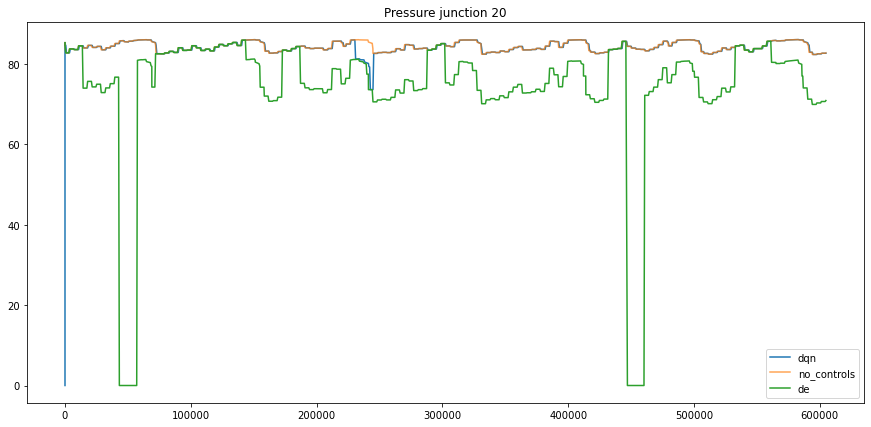

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt

figure, ax = plt.subplots(figsize=[15,7])
lines, = ax.plot(dqn.env.wn.times,
                 [dataset['current_state'][i][4] for i in range(len(dataset.index))], 
                 label='dqn')
lines, = ax.plot(wn.times, wn.df_nodes_report['junctions', '20', 'pressure'], label='no_controls', alpha=0.7)
lines, = ax.plot(wn_de.times, wn_de.df_nodes_report['junctions', '20', 'pressure'], label='de')
ax.legend()
ax.set_title("Pressure junction 20")

Text(0.5, 1.0, 'Pressure tank 41')

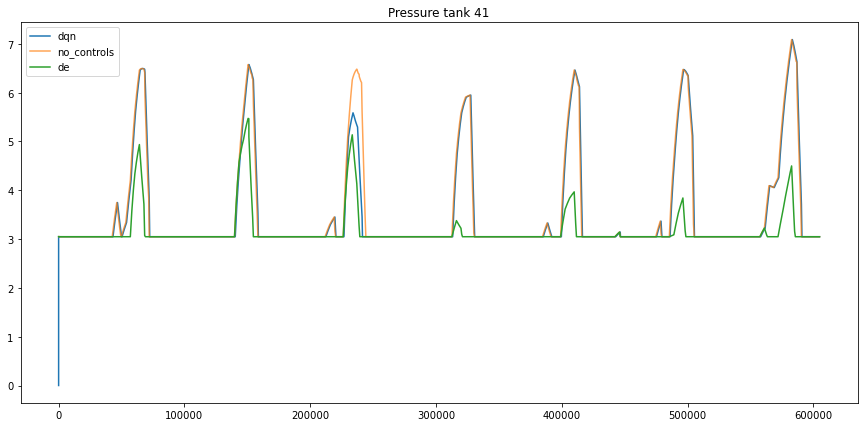

In [46]:
figure, ax = plt.subplots(figsize=[15,7])
lines, = ax.plot(dqn.env.wn.times,
                 [dataset['current_state'][i][2] for i in range(len(dataset.index))], 
                 label='dqn')
lines, = ax.plot(wn.times, wn.df_nodes_report['tanks', '41', 'pressure'], label='no_controls', alpha=0.7)
lines, = ax.plot(wn_de.times, wn_de.df_nodes_report['tanks', '41', 'pressure'], label='de')
ax.legend()
ax.set_title("Pressure tank 41")

Text(0.5, 1.0, 'Pressure tank 42')

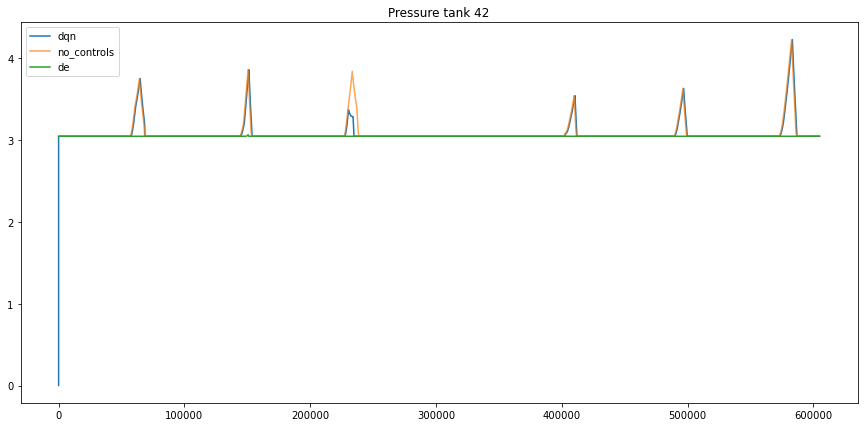

In [54]:
figure, ax = plt.subplots(figsize=[15,7])
lines, = ax.plot(dqn.env.wn.times,
                 [dataset['current_state'][i][3] for i in range(len(dataset.index))], 
                 label='dqn')
lines, = ax.plot(wn.times, wn.df_nodes_report['tanks', '42', 'pressure'], label='no_controls', alpha=0.7)
lines, = ax.plot(wn_de.times, wn_de.df_nodes_report['tanks', '42', 'pressure'], label='de')
ax.legend()
ax.set_title("Pressure tank 42")

Text(0.5, 1.0, 'Status pump 78')

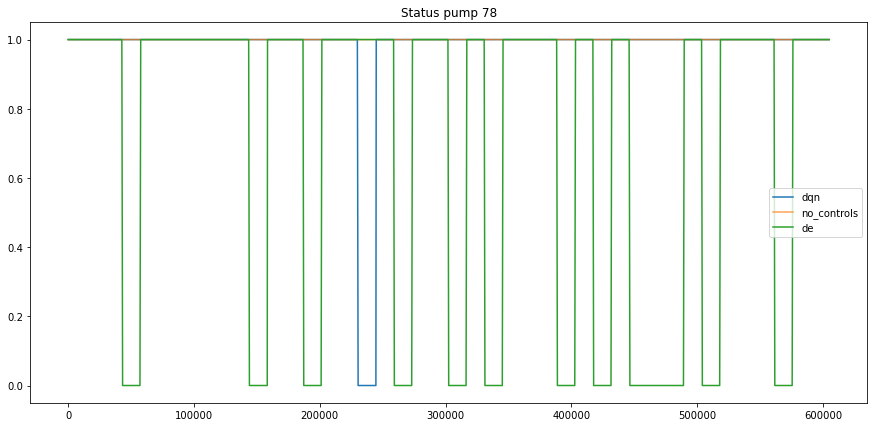

In [57]:
figure, ax = plt.subplots(figsize=[15,7])
lines, = ax.plot(dqn.env.wn.times,
                 dqn.env.wn.df_links_report['pumps', '78', 'status'], 
                 label='dqn')
lines, = ax.plot(wn.times, wn.df_links_report['pumps', '78','status'], label='no_controls', alpha=0.7)
lines, = ax.plot(wn_de.times, wn_de.df_links_report['pumps', '78','status'], label='de')
ax.legend()
ax.set_title("Status pump 78")

Text(0.5, 1.0, 'Status pump 79')

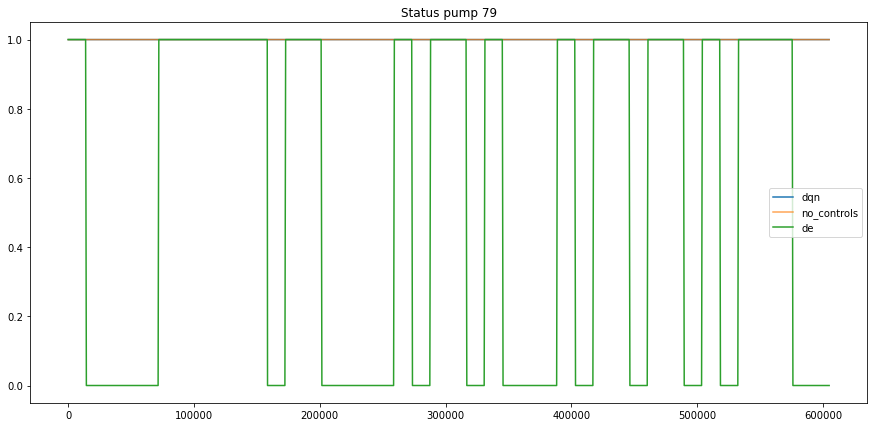

In [58]:
figure, ax = plt.subplots(figsize=[15,7])
lines, = ax.plot(dqn.env.wn.times,
                 dqn.env.wn.df_links_report['pumps', '79', 'status'], 
                 label='dqn')
lines, = ax.plot(wn.times, wn.df_links_report['pumps', '79','status'], label='no_controls', alpha=0.7)
lines, = ax.plot(wn_de.times, wn_de.df_links_report['pumps', '79','status'], label='de')
ax.legend()
ax.set_title("Status pump 79")